## Data cleaning

Notebook with code to clean the data

In [8]:
import os
import json

In [131]:
# Load the JSON data for all files - Get current and its parent directory
cwd = os.getcwd()
repo_root_directory = os.path.dirname(cwd)
dataset_dir = repo_root_directory + "/data-collection/matches/"
print(dataset_dir)
all_json_files = os.listdir(dataset_dir)
dataset_filtered_data_dir = repo_root_directory + "/data-collection/matches-after-cleaning/"

C:\Users\markos-ece\Desktop\Viggiato\PhD - UofA\Research\2-Dota2\git-repo-code/data-collection/matches/


In [132]:
print("\nIterating over all match files...")
count = 0

no_league_info_list = list()
league_id_list = list()
league_tier_list = list()

no_skill_info_list = list()
match_skill_list = list()

no_game_mode_info_list = list()
game_mode_list = list()

match_with_leaver_list = list()
match_with_NO_leaver_list = list()
no_match_player_info_list = list()

game_mode_dict = {}
player_abandon_dict = {}

print("Number of matches : " , len(all_json_files))

for each_json_file in all_json_files:
    if count%1000 == 0:
        print(count)
    count += 1
    with open(dataset_dir+each_json_file, 'r') as f:
        match = json.load(f)
        match_id = match['match_id']
        
    ## collect league info
    try:
        league_obj = match['league']
        league_id = league_obj['leagueid']
        league_tier = league_obj['tier']
        league_id_list.append(league_id)
        league_tier_list.append(league_tier)
    except:
        no_league_info_list.append(match_id)
    
    ## collect match skill
    try:
        match_skill = match['skill']
        match_skill_list.append(match_skill)
    except:
        no_skill_info_list.append(match_id)
    
    ## collect game mode
    try:
        game_mode = match['game_mode']
        game_mode_list.append(int(game_mode))
        game_mode_dict[str(match_id)] = int(game_mode)
    except:
        no_game_mode_info_list.append(match_id)
    
    # check if players abandoned the match
    try:
        match_players = match['players']
        list_leaver_status = list()
        there_is_leaver = False
        for each_player in match_players:
            list_leaver_status.append(int(each_player['leaver_status']))
#             if int(each_player['leaver_status']) > 0:
#                 match_with_leaver_list.append(match_id)
#                 there_is_leaver = True
#         if not there_is_leaver:
#             match_with_NO_leaver_list.append(match_id)
        player_abandon_dict[str(match_id)] = list_leaver_status
    except:
        no_match_player_info_list.append(match_id)


Iterating over all match files...
('Number of matches : ', 86925)
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000


### League info

In [133]:
print(len(no_league_info_list))
print(len(league_id_list))
print(len(league_tier_list))

0
86925
86925


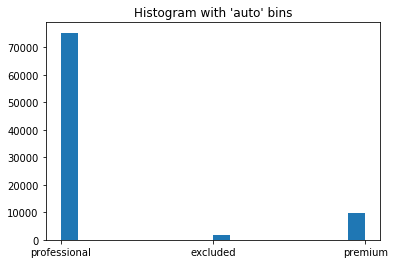

In [134]:
import matplotlib.pyplot as plt
import numpy as np

league_tier_list_np = np.asarray(league_tier_list)
_ = plt.hist(league_tier_list_np, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

### Match skill info

In [135]:
print(len(no_skill_info_list))
print(len(match_skill_list))
match_skill_list_notnull = list()

for skill in match_skill_list:
    if skill is not None:
        match_skill_list_notnull.append(skill)

print(len(match_skill_list_notnull))

0
86925
0


### *** Game mode ***

In [136]:
print(len(no_game_mode_info_list))
print(len(game_mode_list))
print(list(set(game_mode_list))) # unique modes
list_mode_1 = [x for x in game_mode_list if x==1]
print(len(list_mode_1))
list_mode_2 = [x for x in game_mode_list if x==2]
print(len(list_mode_2))

0
86925
[0, 1, 2]
2085
84072


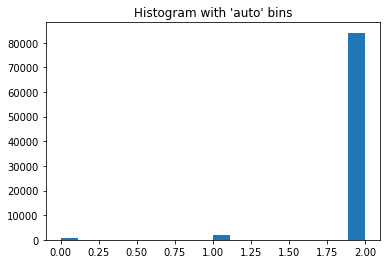

In [137]:
game_mode_list_np = np.asarray(game_mode_list)
_ = plt.hist(game_mode_list_np, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [1]:
matches_to_exclude = list()

In [2]:
count_mode_1 = 0
count_mode_2 = 0

for match in game_mode_dict:
    if game_mode_dict[match] == 1:
        count_mode_1 += 1
    elif game_mode_dict[match] == 2:
        count_mode_2 += 1
    else:
        matches_to_exclude.append(match)
        
print("Game mode 1 : " , count_mode_1)
print("Game mode 2 : " , count_mode_2)
print(len(matches_to_exclude)) 

NameError: name 'game_mode_dict' is not defined

### * Leaver status (player abandoned) *

In [156]:
print(len(match_with_leaver_list))
print(len(match_with_NO_leaver_list))
print(len(no_match_player_info_list))

0
0
1


In [157]:
for match in player_abandon_dict:
    list_status = player_abandon_dict[match]
    for each_status in list_status:
        if each_status > 0:
            matches_to_exclude.append(match)
            break
print(len(matches_to_exclude))
print(matches_to_exclude[:10])

32250
['18355350', '52627429', '23382424', '27266583', '22601579', '47328846', '37338852', '29583255', '23798815', '29809183']


In [158]:
matches_to_exclude_strip = [x.strip() for x in matches_to_exclude]
print(len(matches_to_exclude_strip))

32250


In [161]:
from shutil import copyfile

for each_file in all_json_files:
    file_id = ((each_file.split('-')[1]).split('.')[0]).strip()
    if file_id not in matches_to_exclude_strip:
        copyfile(dataset_dir + "match-" + file_id + ".json", dataset_filtered_data_dir + "match-" + file_id + ".json")
        
#os.rename("path/to/current/file.foo", "path/to/new/destination/for/file.foo")